In [125]:
from utils import setup_env_path

setup_env_path()

%load_ext autoreload
%autoreload 2

Former working directory:  /Users/ambroisebertin/Desktop/prog/prog_abeilles/fil-rouge-pollinisateurs
Current working directory:  /Users/ambroisebertin/Desktop/prog/prog_abeilles/fil-rouge-pollinisateurs
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [126]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import missingno as msno

In [127]:
corineland = pd.read_csv('data/corineland/collection_genre_nouvelle_version.csv', encoding='latin1', sep=';')
spipoll = pd.read_csv('data/spipoll.csv')

corineland = corineland.rename(columns={'nom_collection':'collection_nom','lat':'latitude','long':'longitude','heureDebut':'collection_heure_debut'})

corineland.shape, spipoll.shape

/var/folders/cj/gd9mq5b53w51g6wvzmjj8ymr0000gn/T/ipykernel_98780/912166828.py:1: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  corineland = pd.read_csv('data/corineland/collection_genre_nouvelle_version.csv', encoding='latin1', sep=';')
/var/folders/cj/gd9mq5b53w51g6wvzmjj8ymr0000gn/T/ipykernel_98780/912166828.py:2: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  spipoll = pd.read_csv('data/spipoll.csv')


((47401, 188), (670744, 41))

In [128]:
# affiche les colonnes communes entre les deux jeux de données
list(set(corineland.columns) & set(spipoll.columns))

['collection_nom',
 'nb_validation',
 'collection_heure_debut',
 'latitude',
 'vent',
 'longitude',
 'habitat']

In [129]:
# teste l'homogénéité des colonnes longitudes et latitudes des deux jeux de données
corineland[['latitude','longitude']].iloc[0] == spipoll[['latitude','longitude']].iloc[0]

latitude     True
longitude    True
Name: 0, dtype: bool

In [155]:
# convertit les dates 12/06/2019 00:00 en 2019-06-12 00:00 sans passer au format Timestamp
corineland['collection_heure_debut'] = pd.to_datetime(corineland['collection_heure_debut'], format='%d/%m/%Y %H:%M')

corineland['collection_heure_debut'] = pd.to_datetime(corineland['collection_heure_debut'], format='ISO8601')

In [156]:
spipoll['collection_heure_debut'] = pd.to_datetime(spipoll['collection_heure_debut'], format='ISO8601')

In [157]:
# teste l'homogénéité de la colonne collection_heure_debut des deux jeux de données
corineland['collection_heure_debut'].iloc[0] == spipoll['collection_heure_debut'].iloc[0]

True

In [159]:
# ajoute une colonne "clef_primaire" au début de chaque jeu de données et qui contient la concaténation des colonnes "collection_nom", "latitude" et "longitude"
corineland.insert(0, 'clef_primaire', corineland['collection_heure_debut'].astype(str) + corineland['latitude'].astype(str) + corineland['longitude'].astype(str))
spipoll.insert(0, 'clef_primaire', spipoll['collection_heure_debut'].astype(str) + spipoll['latitude'].astype(str) + spipoll['longitude'].astype(str))

corineland.shape, spipoll.shape

((47401, 189), (670744, 42))

In [160]:
corineland["clef_primaire"].nunique(), spipoll["clef_primaire"].nunique()

(47401, 75033)

In [161]:
# compte les clefs primaires qui sont communes aux deux jeux de données
corineland["clef_primaire"].isin(spipoll["clef_primaire"]).sum()

25385

In [162]:
colonnes_interet = ['colonne111_250',
       'colonne112_250', 'colonne121_250', 'colonne122_250',
       'colonne123_250', 'colonne124_250', 'colonne131_250',
       'colonne132_250', 'colonne133_250', 'colonne141_250',
       'colonne142_250', 'colonne211_250', 'colonne212_250',
       'colonne213_250', 'colonne221_250', 'colonne222_250',
       'colonne223_250', 'colonne231_250', 'colonne241_250',
       'colonne242_250', 'colonne243_250', 'colonne244_250',
       'colonne311_250', 'colonne312_250', 'colonne313_250',
       'colonne321_250', 'colonne322_250', 'colonne323_250',
       'colonne324_250', 'colonne331_250', 'colonne332_250',
       'colonne333_250', 'colonne334_250', 'colonne335_250',
       'colonne411_250', 'colonne412_250', 'colonne421_250',
       'colonne422_250', 'colonne423_250', 'colonne511_250',
       'colonne512_250', 'colonne521_250', 'colonne522_250',
       'colonne523_250', 'colonne111_1000', 'colonne112_1000',
       'colonne121_1000', 'colonne122_1000', 'colonne123_1000',
       'colonne124_1000', 'colonne131_1000', 'colonne132_1000',
       'colonne133_1000', 'colonne141_1000', 'colonne142_1000',
       'colonne211_1000', 'colonne212_1000', 'colonne213_1000',
       'colonne221_1000', 'colonne222_1000', 'colonne223_1000',
       'colonne231_1000', 'colonne241_1000', 'colonne242_1000',
       'colonne243_1000', 'colonne244_1000', 'colonne311_1000',
       'colonne312_1000', 'colonne313_1000', 'colonne321_1000',
       'colonne322_1000', 'colonne323_1000', 'colonne324_1000',
       'colonne331_1000', 'colonne332_1000', 'colonne333_1000',
       'colonne334_1000', 'colonne335_1000', 'colonne411_1000',
       'colonne412_1000', 'colonne421_1000', 'colonne422_1000',
       'colonne423_1000', 'colonne511_1000', 'colonne512_1000',
       'colonne521_1000', 'colonne522_1000', 'colonne523_1000',
       'Moyenne_bio1', 'Moyenne_bio2', 'Moyenne_bio3', 'Moyenne_bio4',
       'Moyenne_bio5', 'Moyenne_bio6', 'Moyenne_bio7', 'Moyenne_bio8',
       'Moyenne_bio9', 'Moyenne_bio10', 'Moyenne_bio11', 'Moyenne_bio12',
       'Moyenne_bio13', 'Moyenne_bio14', 'Moyenne_bio15', 'Moyenne_bio16',
       'Moyenne_bio17', 'Moyenne_bio18', 'Moyenne_bio19', 'classif',
       'espece', 'genre', 'jour_julien', 'jour', 'mois', 'annee',
       'quinzaine', 'temp_moy', 'prep', 'wind', 'ombre', 'col21_250',
       'col21_1000', 'col22_250', 'col22_1000', 'col23_250', 'col23_1000',
       'col24_250', 'col24_1000', 'col31_250', 'col31_1000', 'col32_250',
       'col32_1000', 'col33_250', 'col33_1000', 'col4et5_250',
       'col4et5_1000', 'impermeabilisÃ©_250', 'impermeabilisÃ©_1000',
       'semi_impermeabilisÃ©_250', 'semi_impermeabilisÃ©_1000',
       'position.3', 'digits', 'temp_mois_prev', 'temp_avril_prev',
       'temp_avril_current', 'moyenne_avril', 'moyenne_hiver',
       'temp_hiver', 'moyenne_mois', 'prep_mois_prev', 'prep_avril_prev',
       'prep_avril_current', 'moyenne_prep_hiver', 'moyenne_prep_avril',
       'moyenne_prep_mois', 'prep_hiver', 'temp_avril_current_test',
       'prep_moyenne', 'temp_moyenne']

len(colonnes_interet)

158

In [163]:
# ne conserve que les colonnes d'intérêt dans le jeu de données corineland
corineland = corineland[['clef_primaire'] + colonnes_interet]
corineland.shape, spipoll.shape

((47401, 159), (670744, 42))

In [164]:
# merge des deux dataframe
merged_df = spipoll.merge(corineland, how='left', on='clef_primaire')

In [165]:
merged_df.shape

(670744, 200)

In [166]:
merged_df.head()

,clef_primaire,collection_id,collection_nom,protocole_long,user_id,plante_famille,plante_genre,plante_espece,plante_sc,plante_fr,...,prep_mois_prev,prep_avril_prev,prep_avril_current,moyenne_prep_hiver,moyenne_prep_avril,moyenne_prep_mois,prep_hiver,temp_avril_current_test,prep_moyenne,temp_moyenne
0,2019-06-12 12:20:0045.3638083333336.5149472222222,1,sentier ZH,NaN,12 657,Fabaceae,Trifolium,Trifolium pratense,Les Trèfles à fleurs blanches ou roses en boul...,NaN,...,1.020455,-0.562879,-0.306212,2.872094,2.431515,3.239697,0.322265,0.270667,2.922175,3.23472
1,2019-06-12 12:20:0045.3638083333336.5149472222222,1,sentier ZH,NaN,12 657,Fabaceae,Trifolium,Trifolium pratense,Les Trèfles à fleurs blanches ou roses en boul...,NaN,...,1.020455,-0.562879,-0.306212,2.872094,2.431515,3.239697,0.322265,0.270667,2.922175,3.23472
2,2019-06-20 10:50:0048.84497508441272.358312914...,2,Ma belle collection au jardin des plantes !,NaN,10 918,Acanthaceae,Acanthus,Acanthus spinosus,Acanthus mollis,Acanthe molle,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-06-20 10:50:0048.84497508441272.358312914...,2,Ma belle collection au jardin des plantes !,NaN,10 918,Acanthaceae,Acanthus,Acanthus spinosus,Acanthus mollis,Acanthe molle,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-06-20 10:50:0048.84497508441272.358312914...,2,Ma belle collection au jardin des plantes !,NaN,10 918,Acanthaceae,Acanthus,Acanthus spinosus,Acanthus mollis,Acanthe molle,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: >

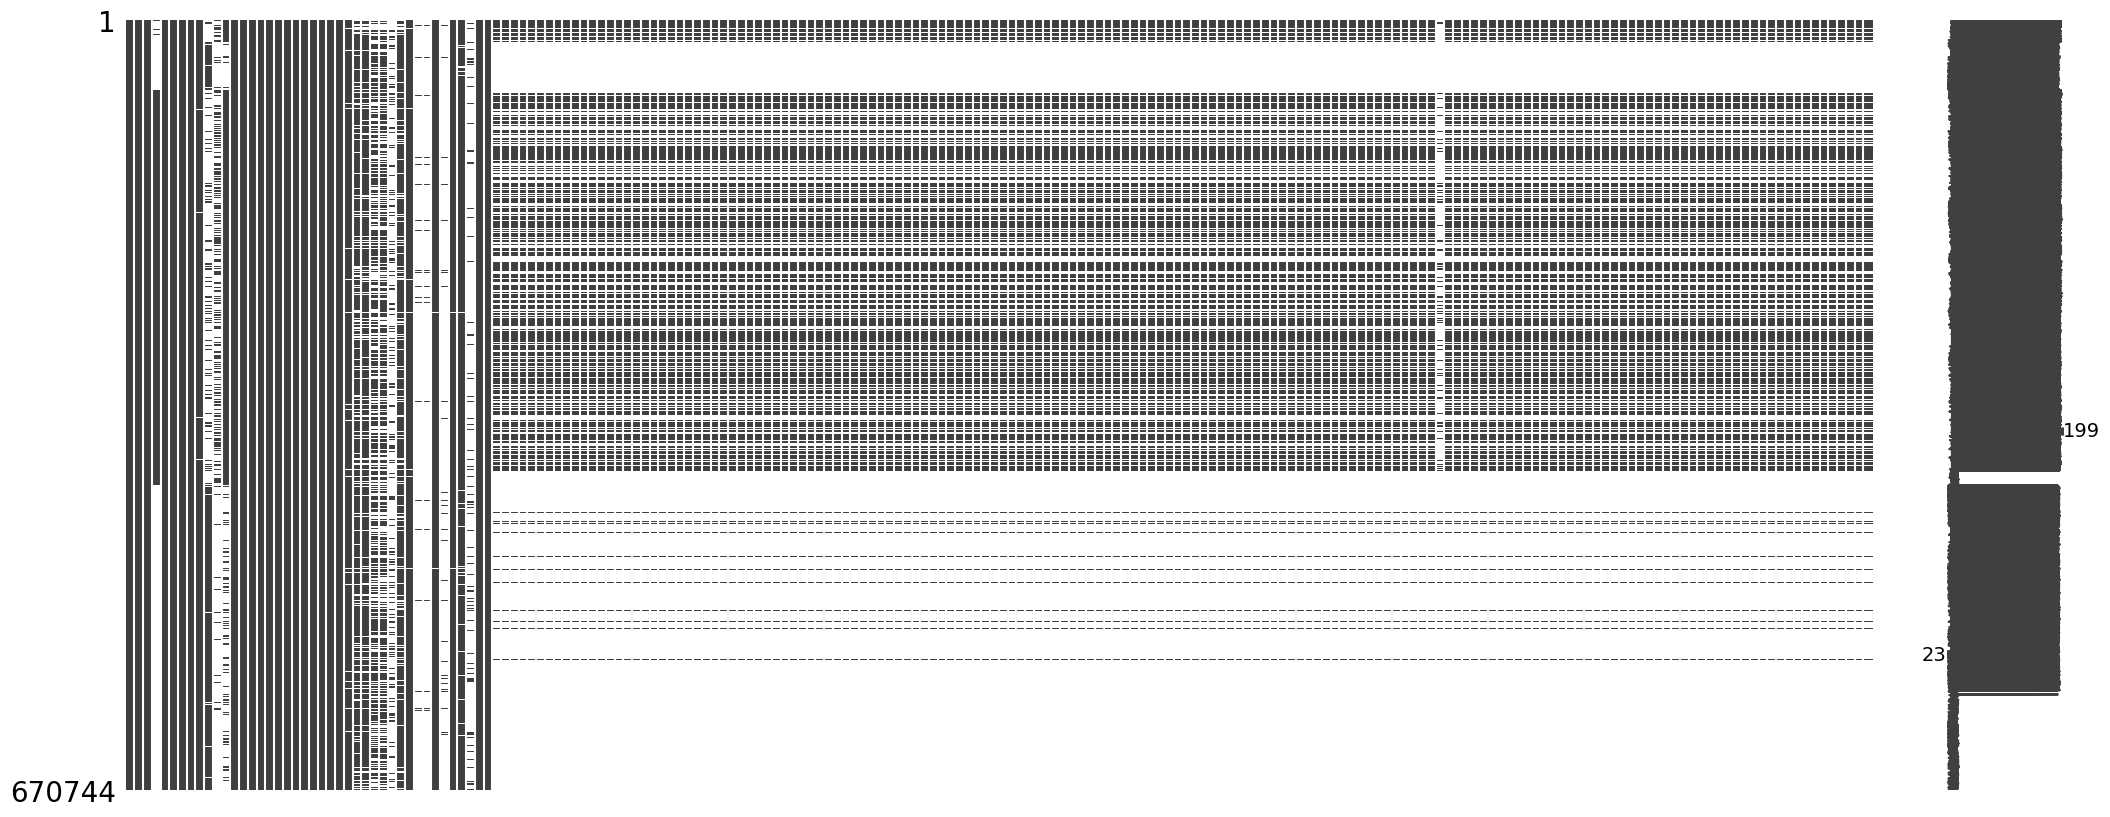

In [167]:
msno.matrix(merged_df)